In [35]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random
import matplotlib.dates as mdates

def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h), int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

# Yoel wearing Shirt #15
shirt = {
    "9C54" : "Back Neck",
    "9968" : "Back",
    "65E1" : "Chest",
    "5E23" : "Left Abdomen",
    "ACB3" : "Right Abdomen",
    "7AD3" : "Right Upper Arm",
    "99A1" : "Right Lower Arm",
    "B19D" : "Left Lower Arm",
    "43C6" : "Left Upper Arm",
    "7DCB" : "Beanie 1",
    "9D35" : "Beanie 2",
    "6FD0" : "Beanie 3",
    "34CE" : "Beanie R",
    "62E3" : "Beanie L"
}
shirt_marker = {
    "9C54" : "o",
    "9968" : "v",
    "65E1" : "^",
    "5E23" : "1",
    "ACB3" : "8",
    "7AD3" : "s",
    "99A1" : "p",
    "B19D" : "*",
    "43C6" : "d",
}
pants = {
    "B29D" : "Left Glute",
    "7DC5" : "Right Glute",
    "0867" : "Left Hamstring",
    "6BB3" : "Right Hamstring",
    "AC88" : "Left Calf",
    "14BA" : "Right Calf",
    "24A2" : "Left Quad",
    "9039" : "Right Quad"
}
pants_marker = {
    "B29D" : "o",
    "7DC5" : "v",
    "0867" : "^",
    "6BB3" : "1",
    "AC88" : "8",
    "14BA" : "s",
    "24A2" : "p",
    "9039" : "*"
}
pants_color = {
    "B29D" : "red",
    "7DC5" : "blue",
    "0867" : "forestgreen",
    "6BB3" : "c",
    "AC88" : "darkorange",
    "14BA" : "springgreen",
    "24A2" : "darkmagenta",
    "9039" : "black"
}

y1  = MakeDataFromText("Yoel Run Data/tags 1.txt")
y2  = MakeDataFromText("Yoel Run Data/tags 2.txt")
y3  = MakeDataFromText("Yoel Run Data/tags 3.txt")
y4  = MakeDataFromText("Yoel Run Data/tags 4.txt")
y5  = MakeDataFromText("Yoel Run Data/tags 5.txt")
y6  = MakeDataFromText("Yoel Run Data/tags 6.txt")
y7  = MakeDataFromText("Yoel Run Data/tags 7.txt")
y8  = MakeDataFromText("Yoel Run Data/tags 8.txt")
y9  = MakeDataFromText("Yoel Run Data/tags 9.txt")
y10 = MakeDataFromText("Yoel Run Data/tags 10.txt")
y11 = MakeDataFromText("Yoel Run Data/tags 11.txt")
y12 = MakeDataFromText("Yoel Run Data/tags 12.txt")
y13 = MakeDataFromText("Yoel Run Data/tags 13.txt")
y14 = MakeDataFromText("Yoel Run Data/tags 14.txt")
y15 = MakeDataFromText("Yoel Run Data/tags 15.txt")

# Combine all data into one dictionary
combined = dict()
for d in [ y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15 ]:
    for k,v in d.items():
        if k in combined:                                 # if tag is already in dict
            for i in range(len(v[0])):                    # iterate over all time points
                if v[0][i] in combined[k]:                # if time point is already in dict
                    combined[k][v[0][i]].append(v[1][i])
                else:                                     # if time point is not in dict
                    combined[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]

for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2) # avg all points taken during the same second

In [36]:
iii = []
for k,v in combined.items():
    epc = k[-4:]
    s = sorted( v.items() )

    if epc in shirt.keys():
        iii.append ([shirt[epc], len( [ j[1] for j in s if j[0]<datetime.datetime(1970, 2, 1, 12, 52, 0) and j[0]>datetime.datetime(1970, 2, 1, 11, 30, 0) ] )] )
    elif epc in pants.keys():   
        iii.append ([pants[epc], len( [ j[1] for j in s if j[0]<datetime.datetime(1970, 2, 1, 12, 52, 0) and j[0]>datetime.datetime(1970, 2, 1, 11, 30, 0) ] )] )
    else:
        print("ERROR: EPC not found in dictionary!")

def Sort(sub_li):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    sub_li.sort(key = lambda x: x[1], reverse=True)
    return sub_li

iii = Sort(iii)
print("True Amount of Reads per \nBodypart of Yoel's Run", "\n")
for i in iii:
    print(i)

True Amount of Reads per 
Bodypart of Yoel's Run 

['Right Upper Arm', 295]
['Right Quad', 252]
['Left Quad', 217]
['Chest', 189]
['Left Lower Arm', 189]
['Right Abdomen', 179]
['Left Upper Arm', 151]
['Right Lower Arm', 142]
['Right Glute', 119]
['Back', 82]
['Left Glute', 65]
['Right Hamstring', 56]
['Left Abdomen', 54]
['Left Hamstring', 36]
['Left Calf', 21]
['Right Calf', 18]
['Back Neck', 12]


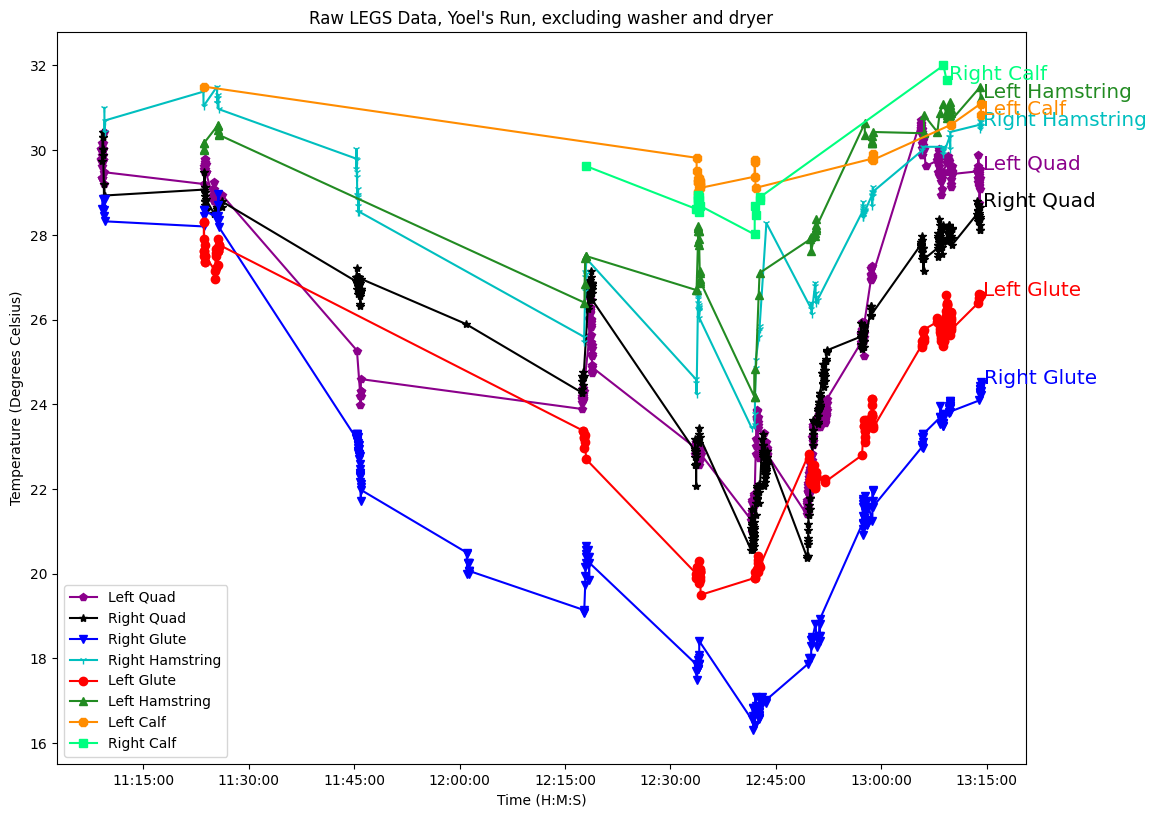

In [37]:
myFmt = mdates.DateFormatter('%H:%M:%S')
fig, ax = plt.subplots(figsize=(12.5, 9.5))
ax.xaxis.set_major_formatter(myFmt)

for k,v in combined.items():
    epc = k[-4:]
    s = sorted( v.items() )

    time = [ j[0] for j in s if j[0]<datetime.datetime(1970, 2, 1, 14, 0, 0) ]
    data = [ j[1] for j in s if j[0]<datetime.datetime(1970, 2, 1, 14, 0, 0) ]

    if epc in pants.keys():
        ax.plot(time, data, label=pants[epc], marker=pants_marker[epc], color=pants_color[epc])

        ax.text(
            # time[ int(len(time)/6) ] + datetime.timedelta(seconds=20),
            # data[ int(len(data)/6) ],
            time[ -1] + datetime.timedelta(seconds=20),
            data[-1],
            pants[epc],
            color=pants_color[epc],
            fontsize="x-large"
        )
    

ax.set_title("Raw LEGS Data, Yoel's Run, excluding washer and dryer")
ax.set_xlabel("Time (H:M:S)")
ax.set_ylabel("Temperature (Degrees Celsius)")
ax.legend()